In [1]:
import sys
sys.path.append('lib_gmi/')
from lib_gmi.gmi_daily_v8 import GMIdaily
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# declaration functions
def read_data(filename='data/gmi/f35_20161001v8.2.gz'):
    dataset = GMIdaily(filename, missing=missing)
    if not dataset.variables: sys.exit('problem reading file')
    return dataset

def show_variables(ds):
    print()
    print('Variables:')
    for var in ds.variables:
        print(' '*4, var, ':', ds.variables[var].long_name)

def show_validrange(ds):
    print()
    print('Valid min and max and units:')
    for var in ds.variables:
        print(' '*4, var, ':', \
              ds.variables[var].valid_min, 'to', \
              ds.variables[var].valid_max,\
              '(',ds.variables[var].units,')')

In [3]:
### function to insert variables to dataset
def insert_var(ds, var, name, units, long_name):
    ds[name] = (('lat','lon'), var)
    ds[name].attrs['units'] = units
    ds[name].attrs['long_name'] = long_name
    ds[name].attrs['_FillValue'] = -9999

In [4]:
ilon = (169,174)
ilat = (273,277)
iasc = 0
avar = 'sst'
missing = -999.

dataset = read_data()
show_variables(dataset)
show_validrange(dataset)


Variables:
     time : Time of Day UTC
     sst : Sea Surface Temperature
     windLF : 10m Surface Wind Speed (low frequency)
     windMF : 10m Surface Wind Speed (medium frequency)
     vapor : Columnar Water Vapor
     cloud : Cloud Liquid Water
     rain : Surface Rain Rate
     longitude : Grid Cell Center Longitude
     latitude : Grid Cell Center Latitude
     land : Is this land?
     ice : Is this ice?
     nodata : Is there no data?

Valid min and max and units:
     time : 0.0 to 24.0 ( fractional hours UTC )
     sst : -3.0 to 34.5 ( deg Celsius )
     windLF : 0.0 to 50.0 ( m/s )
     windMF : 0.0 to 50.0 ( m/s )
     vapor : 0.0 to 75.0 ( mm )
     cloud : -0.05 to 2.45 ( mm )
     rain : 0.0 to 25.0 ( mm/hr )
     longitude : 0.0 to 360.0 ( degrees east )
     latitude : -90.0 to 90.0 ( degrees north )
     land : False to True ( True or False )
     ice : False to True ( True or False )
     nodata : False to True ( True or False )


In [5]:
## create netcdf gmi
ds = xr.Dataset()

ds.coords['lon'] = dataset.variables['longitude'] - 180
ds.lon.attrs['standard_name'] = 'lon'
ds.lon.attrs['long_name'] = 'longitude'
ds.lon.attrs['units'] = 'degrees_east'

ds.coords['lat'] = dataset.variables['latitude']
ds.lat.attrs['standard_name'] = 'lat'
ds.lat.attrs['long_name'] = 'latitude'
ds.lat.attrs['units'] = 'degrees_north'

In [6]:
# Valid min and max and units: sst : -3.0 to 34.5 ( deg Celsius )
sst = dataset.variables['sst'][:,:,:]
sst[sst < -3 ]   = np.nan
sst[sst > 34.5 ] = np.nan
sst = np.nanmean(sst, axis=0)
sst = np.concatenate((sst[:,720:1440],sst[:,0:720]), axis=1)

insert_var(ds, sst,'SST','°C','Sea Surface Temperature')

<ipython-input-6-ec8c01a26652>:5: RuntimeWarning: Mean of empty slice
  sst = np.nanmean(sst, axis=0)


In [7]:
sst_mod  = xr.open_dataset('data/modis/A2016275.L3m_DAY_SST_sst_4km.nc')
nsst_mod = xr.open_dataset('data/modis/A2016275.L3m_DAY_NSST_sst_4km.nc')
nsst_mod

<xarray.Dataset>
Dimensions:   (eightbitcolor: 256, lat: 4320, lon: 8640, rgb: 3)
Coordinates:
  * lat       (lat) float32 89.979164 89.9375 89.89583 ... -89.93751 -89.97918
  * lon       (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes:
    product_name:                      A2016275.L3m_DAY_NSST_sst_4km.nc
    instrument:                        MODIS
    title:                             HMODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2014.0.1QL
    date_created:                      2016-10-02T10:35:46.000Z
    history:                           l3mapgen par=A2016275.L3m_DAY_NSST_sst...
    l2_flag_names:                     LAND,~HISOLZEN
    time_coverage_start:               2016-09-30T12:45:10.000Z
    time_coverage_end:                 2016-10-01T14:20:08.000Z
    start_orbit_number:                76672
    end_orbit_number:                  76688
    map_projection:                    Equidistant Cylindrical
    latitude_units:                    degrees_north
    longitude_units:                   degrees_east
    northernmost_latitude:             90.0
    southernmost_latitude:             -90.0
    westernmost_longitude:             -180.0
    easternmost_longitude:             180.0
    geospatial_lat_max:                90.0
    geospatial_lat_min:                -90.0
    geospatial_lon_max:                180.0
    geospatial_lon_min:                -180.0
    grid_mapping_name:                 latitude_longitude
    latitude_step:                     0.041666668
    longitude_step:                    0.041666668
    sw_point_latitude:                 -89.979164
    sw_point_longitude:                -179.97917
    geospatial_lon_resolution:         4.6383123
    geospatial_lat_resolution:         4.6383123
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    spatialResolution:                 4.64 km
    number_of_lines:                   4320
    number_of_columns:                 8640
    measure:                           Mean
    suggested_image_scaling_minimum:   -2.0
    suggested_image_scaling_maximum:   45.0
    suggested_image_scaling_type:      LINEAR
    suggested_image_scaling_applied:   No
    _lastModified:                     2016-10-02T10:35:46.000Z
    Conventions:                       CF-1.6
    institution:                       NASA Goddard Space Flight Center, Ocea...
    standard_name_vocabulary:          NetCDF Climate and Forecast (CF) Metad...
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    id:                                A2016275.L3b_DAY_NSST.nc/L3/A2016275.L...
    license:                           http://science.nasa.gov/earth-science/...
    creator_name:                      NASA/GSFC/OBPG
    publisher_name:                    NASA/GSFC/OBPG
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    creator_url:                       http://oceandata.sci.gsfc.nasa.gov
    publisher_url:                     http://oceandata.sci.gsfc.nasa.gov
    processing_level:                  L3 Mapped
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS_OC.2014.0
    keywords:                          Oceans > Ocean Temperature > Sea Surfa...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                     

In [8]:
## create netcdf modis

ds_modis = xr.Dataset()

ds_modis.coords['lon'] = sst_mod['lon'].values
ds_modis.lon.attrs['standard_name'] = 'lon'
ds_modis.lon.attrs['long_name'] = 'longitude'
ds_modis.lon.attrs['units'] = 'degrees_east'

ds_modis.coords['lat'] = sst_mod['lat'].values
ds_modis.lat.attrs['standard_name'] = 'lat'
ds_modis.lat.attrs['long_name'] = 'latitude'
ds_modis.lat.attrs['units'] = 'degrees_north'


In [9]:
# Valid min and max and units: sst : -2.0 to 45 ( deg Celsius )
sst_modis = np.dstack((sst_mod['sst'].values, nsst_mod['sst'].values))
sst_modis[sst_modis < -2] = np.nan
sst_modis[sst_modis > 45] = np.nan
sst_modis = np.nanmean(sst_modis, axis=2)
insert_var(ds_modis, sst_modis,'SST','°C','Sea Surface Temperature')

<ipython-input-9-5fa2c32cd6ac>:5: RuntimeWarning: Mean of empty slice
  sst_modis = np.nanmean(sst_modis, axis=2)


In [10]:
# Interpolate from modis to gmi
sst_modisi = ds_modis.interp(lat=ds['lat'], lon=ds['lon'])

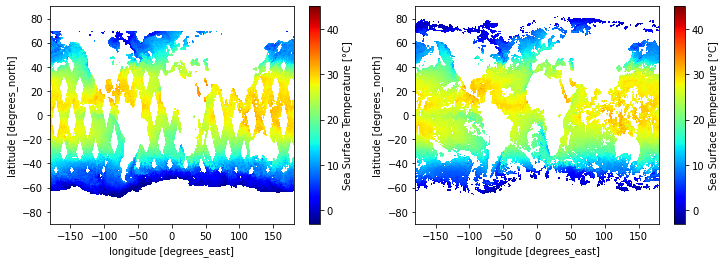

In [11]:
# plot sst gmi and modis
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
ds['SST'].plot(ax=axes[0], vmin = -3, vmax = 45, cmap = 'jet', clim=(-3, 45))
sst_modisi['SST'].plot(ax=axes[1], vmin = -3, vmax = 45, cmap = 'jet', clim=(-3, 45))
fig.savefig('plots/sst_gmi_modis.png',dpi = 300, bbox_inches = 'tight',pad_inches = 0.1)

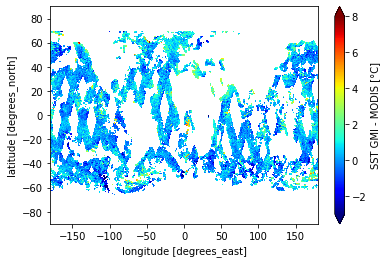

In [12]:
# plot diference SST GMI - MODIS
fig, axes = plt.subplots(figsize=(6, 4))
(ds['SST']-sst_modisi['SST']).plot(vmin = -3, vmax = 8, cmap = 'jet', clim=(-3, 8), cbar_kwargs={'label': 'SST GMI - MODIS [°C]'})
fig.savefig('plots/sst_diff_gmi_modis.png',dpi = 300, bbox_inches = 'tight',pad_inches = 0.1)

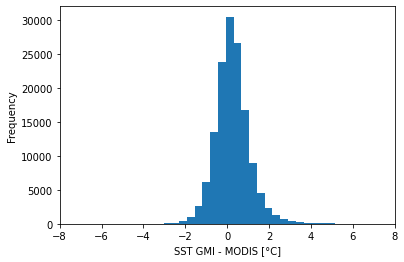

In [13]:
# plot hist diference SST GMI - MODIS
fig, axes = plt.subplots(figsize=(6, 4))
(ds['SST']-sst_modisi['SST']).plot.hist(bins=50)
axes.set_xlim(-8,8)
axes.set_ylabel('Frequency')
axes.set_xlabel('SST GMI - MODIS [°C]')
axes.set_title('')
fig.savefig('plots/hist_gmi_modis.png',dpi = 300, bbox_inches = 'tight',pad_inches = 0.1)

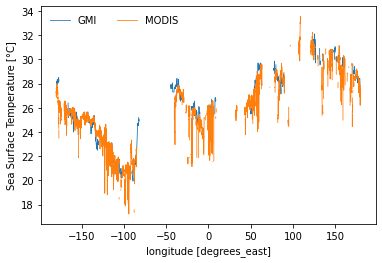

In [14]:
# plot profile SST GMI and MODIS
fig, axes = plt.subplots(figsize=(6, 4))
ds['SST'].sel(lat=0,  method='nearest').plot(label='GMI', lw=0.8)
ds_modis['SST'].sel(lat=0,  method='nearest').plot(label='MODIS', lw=0.8)
axes.set_title('')
axes.legend(loc='best',ncol=2, frameon=False)
fig.savefig('plots/profile_sst.png',dpi = 300, bbox_inches = 'tight',pad_inches = 0.1)